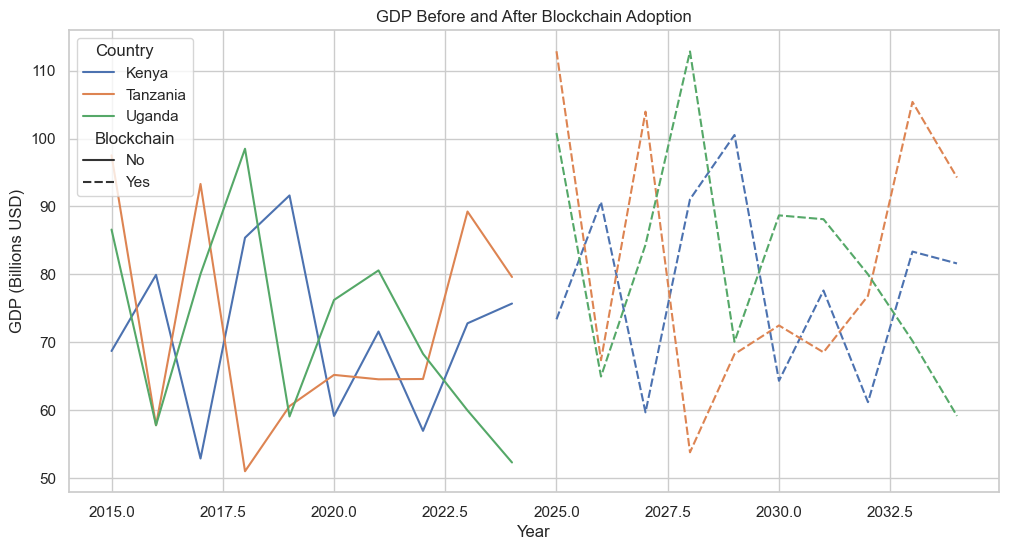

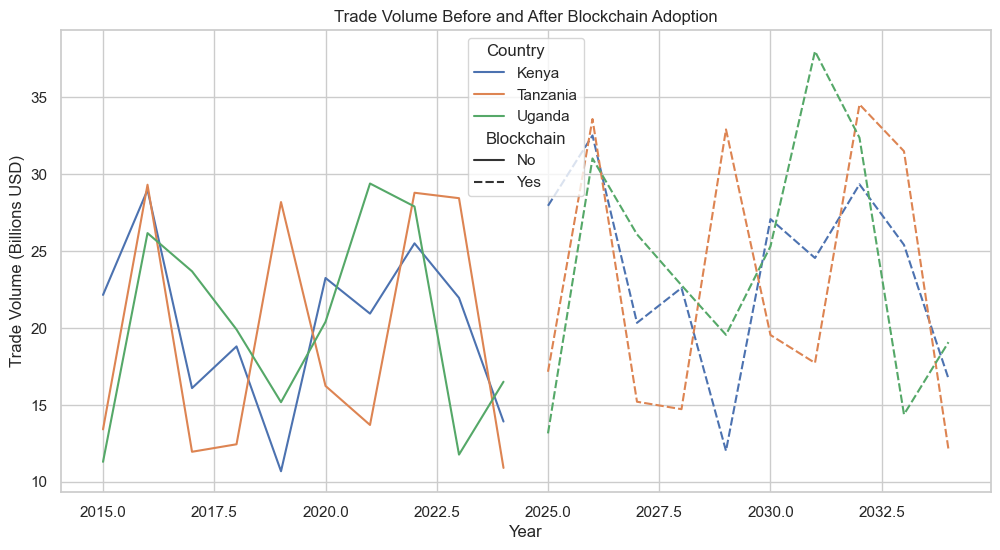

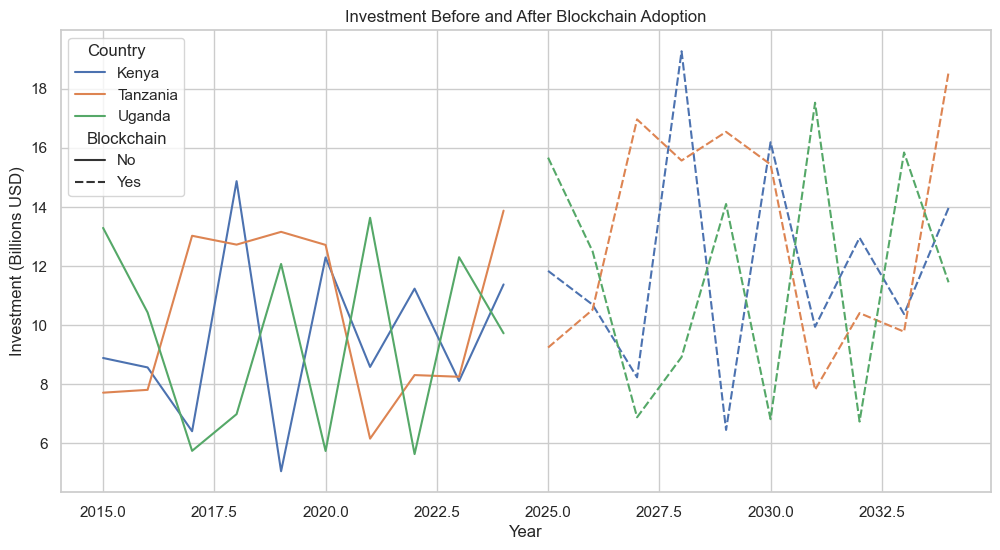

NameError: name 'train_test_' is not defined

In [3]:
# Install necessary libraries
# !pip install pandas seaborn scikit-learn numpy matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Data Simulation
np.random.seed(42)  # for reproducibility

# Simulate pre-blockchain data (GDP, Trade Volume, Investment)
n_years = 10
countries = ['Kenya', 'Tanzania', 'Uganda']

data = {
    'Year': np.repeat(range(2015, 2015 + n_years), len(countries)),
    'Country': np.tile(countries, n_years),
    'GDP': np.random.uniform(50, 100, n_years * len(countries)),  # in billions USD
    'TradeVolume': np.random.uniform(10, 30, n_years * len(countries)),  # in billions USD
    'Investment': np.random.uniform(5, 15, n_years * len(countries))  # in billions USD
}

df = pd.DataFrame(data)

# Simulate post-blockchain data (improvements due to XDC blockchain)
data_post = {
    'Year': np.repeat(range(2025, 2025 + n_years), len(countries)),
    'Country': np.tile(countries, n_years),
    'GDP': df['GDP'].values * (1 + np.random.uniform(0.05, 0.20, n_years * len(countries))),  # 5-20% increase
    'TradeVolume': df['TradeVolume'].values * (1 + np.random.uniform(0.10, 0.30, n_years * len(countries))),  # 10-30% increase
    'Investment': df['Investment'].values * (1 + np.random.uniform(0.15, 0.35, n_years * len(countries)))  # 15-35% increase
}

df_post = pd.DataFrame(data_post)

# Combine pre and post blockchain data
df['Blockchain'] = 'No'
df_post['Blockchain'] = 'Yes'
combined_df = pd.concat([df, df_post], ignore_index=True)

# Data Visualization
# Set style for seaborn plots
sns.set(style="whitegrid")

# Plot GDP before and after blockchain adoption
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GDP', hue='Country', style='Blockchain', data=combined_df)
plt.title('GDP Before and After Blockchain Adoption')
plt.ylabel('GDP (Billions USD)')
plt.show()

# Plot Trade Volume before and after blockchain adoption
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='TradeVolume', hue='Country', style='Blockchain', data=combined_df)
plt.title('Trade Volume Before and After Blockchain Adoption')
plt.ylabel('Trade Volume (Billions USD)')
plt.show()

# Plot Investment before and after blockchain adoption
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Investment', hue='Country', style='Blockchain', data=combined_df)
plt.title('Investment Before and After Blockchain Adoption')
plt.ylabel('Investment (Billions USD)')
plt.show()

# Linear Regression Model - Predicting GDP
# Prepare data for linear regression
df_numeric = combined_df.copy()
df_numeric['Blockchain'] = df_numeric['Blockchain'].map({'No': 0, 'Yes': 1})
df_numeric['Country'] = df_numeric['Country'].astype('category').cat.codes

# Features and target
X = df_numeric[['Year', 'Blockchain', 'TradeVolume', 'Investment', 'Country']]
y = df_numeric['GDP']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_
